In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import skimage as sk
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
print(tf.__version__)
tf.config.set_visible_devices([], 'GPU')

2.13.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

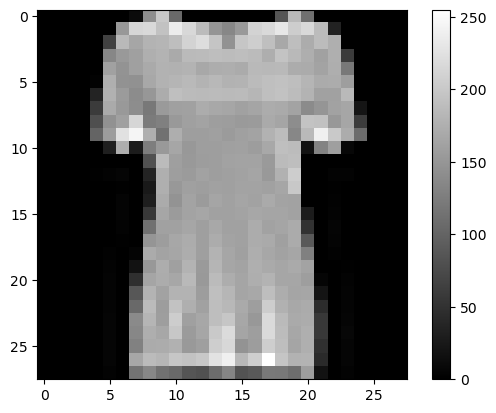

In [9]:
plt.figure()
plt.imshow(train_images[10], cmap = "gray")
plt.colorbar()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

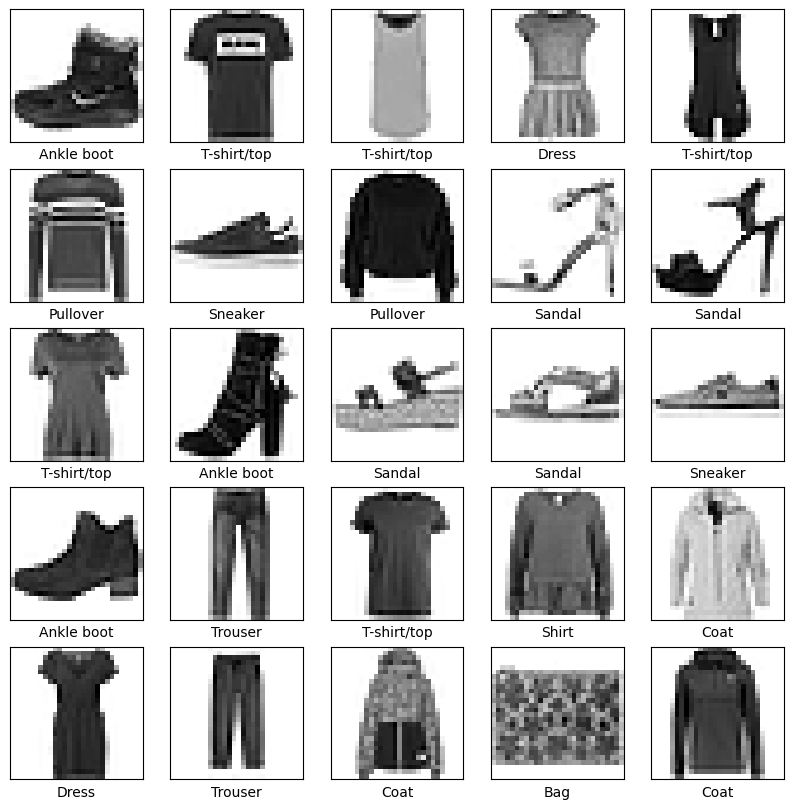

In [11]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.4996 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.3713 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.3335 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.3070 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.2928 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.2759 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 1s 601us/step - loss: 0.2640 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.2452 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 1s 629u

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.3336 - accuracy: 0.8836 - 169ms/epoch - 538us/step


In [15]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()])

In [16]:
predictions = prob_model.predict(test_images)
print("True label : ", class_names[test_labels[0]],"\n" )
print("Predicted label :",class_names[np.argmax(predictions[0])])

313/313 [==============================] - 0s 371us/step
True label :  Ankle boot 

Predicted label : Ankle boot


In [17]:
result = np.argmax(predictions, axis = 1) == test_labels
result.astype(int)
result = np.sum(result)/len(test_labels)
result

0.8836

In [18]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


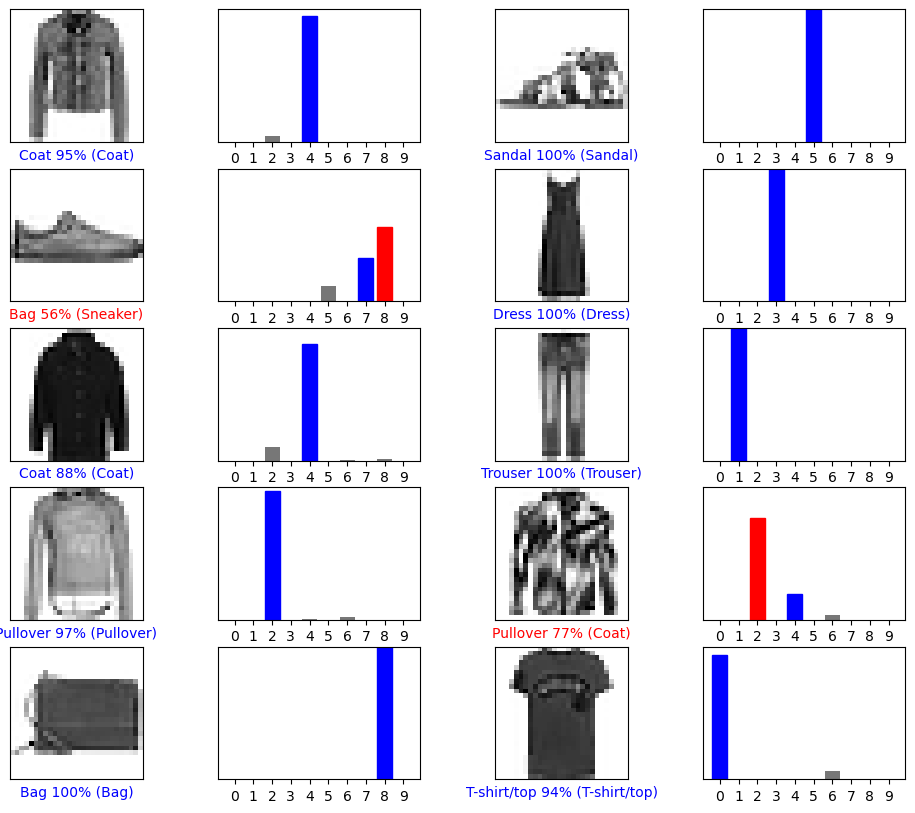

In [20]:

plt.figure(figsize=(12,10))
for i in range(10):
    plt.subplot(5,4,2*i+1)
    plot_image(i+10, predictions[i+10], test_labels, test_images)
    plt.subplot(5,4,2*i+2)
    plot_value_array(i+10, predictions[i+10],  test_labels)
plt.show()
